In [1]:
##-----------------------------------------------------------------------------
## Import
##-----------------------------------------------------------------------------
import time
import os
import h5py
import math
#import warnings
#warnings.simplefilter(action = "ignore", category = RuntimeWarning)

import scipy.io as sio 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.callbacks import TensorBoard
#from newv_focal_loss import *

##-----------------------------------------------------------------------------
## GPU Selection
##-----------------------------------------------------------------------------
os.environ['CUDA_VISIBLE_DEVICES']='0'
tf.reset_default_graph()

Using TensorFlow backend.


In [2]:
##-----------------------------------------------------------------------------
## Load data
##-----------------------------------------------------------------------------
DataIntensity1 = h5py.File('../augbroken3.mat', 'r')
Intensity1 = np.array(DataIntensity1.get('dataCrop'))
DataIntensity2 = h5py.File('../augbroken4.mat', 'r')
Intensity2 = np.array(DataIntensity2.get('dataCrop'))
DataIntensity3 = h5py.File('../augbroken7.mat', 'r')
Intensity3 = np.array(DataIntensity3.get('dataCrop'))

DataIntensity4 = h5py.File('../auggood2.mat', 'r')
Intensity4 = np.array(DataIntensity4.get('dataCrop'))
DataIntensity5 = h5py.File('../auggood4.mat', 'r')
Intensity5 = np.array(DataIntensity5.get('dataCrop'))


#Intensity = Intensity.T
DataType1 = sio.loadmat('../augbrokentype3.mat')
Type1 = np.array(DataType1['dataType'])
DataType2 = sio.loadmat('../augbrokentype4.mat')
Type2 = np.array(DataType2['dataType'])
DataType3 = sio.loadmat('../augbrokentype7.mat')
Type3 = np.array(DataType3['dataType'])

DataType4 = sio.loadmat('../auggoodtype2.mat')
Type4 = np.array(DataType4['dataType'])
DataType5 = sio.loadmat('../auggoodtype4.mat')
Type5 = np.array(DataType5['dataType'])

In [3]:
MaxIntensity = 65535

In [4]:
print("Intensity1.shape={}, Intensity2.shape={}".format(Intensity1.shape, Intensity2.shape))
print("Intensity3.shape={}".format(Intensity3.shape))
print("Intensity4.shape={}, Intensity5.shape={}".format(Intensity4.shape, Intensity5.shape))

print("Type1.shape={}, Type2.shape={}".format(Type1.shape, Type2.shape))
print("Type3.shape={}".format(Type3.shape))
print("Type4.shape={}, Type5.shape={}".format(Type4.shape, Type5.shape))

Intensity1.shape=(2880, 81, 81, 81), Intensity2.shape=(2880, 81, 81, 81)
Intensity3.shape=(1224, 81, 81, 81)
Intensity4.shape=(2880, 81, 81, 81), Intensity5.shape=(1656, 81, 81, 81)
Type1.shape=(2880, 1), Type2.shape=(2880, 1)
Type3.shape=(1224, 1)
Type4.shape=(2880, 1), Type5.shape=(1656, 1)


In [5]:
Intensity = np.vstack((Intensity1,Intensity2,Intensity3,Intensity4,Intensity5))/MaxIntensity
print("Intensity.shape={}".format(Intensity.shape))
Type = np.vstack((Type1,Type2,Type3,Type4,Type5))
print("Type.shape={}".format(Type.shape))

Intensity.shape=(11520, 81, 81, 81)
Type.shape=(11520, 1)


In [6]:
y_train = Intensity
print("y_train.shape={}".format(y_train.shape))

y_train.shape=(11520, 81, 81, 81)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

The model 0 is restored suscessfully!
[0 0 0 ... 1 1 1]
The prediction 0 is completed suscessfully!
Time=66.50637435913086sec
----------------------------------------------------------------
------------------------------------------------------------------------------------------------------
All Predictions are completed!
All Time=66.51074719429016sec


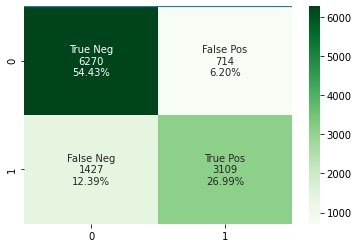

The model 0 is restored suscessfully!
[0 0 0 ... 1 1 1]
The prediction 0 is completed suscessfully!
Time=72.55891156196594sec
----------------------------------------------------------------
------------------------------------------------------------------------------------------------------
All Predictions are completed!
All Time=72.56370210647583sec


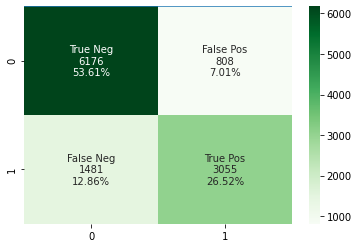

The model 0 is restored suscessfully!
[0 0 0 ... 1 1 1]
The prediction 0 is completed suscessfully!
Time=71.58520603179932sec
----------------------------------------------------------------
------------------------------------------------------------------------------------------------------
All Predictions are completed!
All Time=71.58902955055237sec


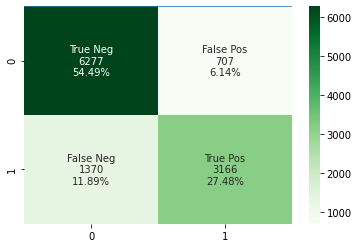

In [7]:
TrainRun = 0
TrainModel = 3
MODELS = 1
for F in range(TrainModel):
    F = F + 1


    ##-----------------------------------------------------------------------------
    ## Time
    ##-----------------------------------------------------------------------------
    tic1 = time.time()
    fp = open(str(F) + "/T" + str(TrainRun) + "/PredictResult.txt", "w")  #####------------------------------ print




    ##-----------------------------------------------------------------------------
    ## Normalize Testing set (z-score : (x-x.mean)/x.std)
    ##-----------------------------------------------------------------------------

    #y_train_Norm = np.zeros((y_train.shape[0], y_train.shape[1], y_train.shape[2], y_train.shape[3]))
    #for iNum_Atom in range(y_train.shape[0]):
    #    y_train_Norm[iNum_Atom,:,:,:] = (y_train[iNum_Atom,:,:,:] - y_train[iNum_Atom,:,:,:].mean() )/ y_train[iNum_Atom,:,:,:].std()
    #print("y_train_Norm.shape={}".format(y_train_Norm.shape)) 


    ##-----------------------------------------------------------------------------
    ## Reshape Training set & x_label ---> one hot
    ##-----------------------------------------------------------------------------
    y_train_NR = y_train.reshape(y_train.shape[0], y_train.shape[1], y_train.shape[2], y_train.shape[3], 1)


    #MODELS = 11
    #y_pred = np.zeros((MODELS, 23804))
    from keras.models import load_model
    from keras import backend as K

    for m in range(MODELS):
        tic = time.time()

        prediction_result = []

        model = load_model(str(F) + '/my_CNNmodel_%d.h5'%(m))
        #model = load_model('my_CNNmodel_%d.h5'%(m), custom_objects={'focal_loss':focal_loss})

        print("The model %s is restored suscessfully!"%(m)) 

        prediction_result = model.predict(y_train_NR)
        prediction_cluster = model.predict_classes(y_train_NR)
        prediction_result = np.float32(prediction_result) 
        #-------------save
        sio.savemat(str(F) + "/T" + str(TrainRun) + '/prediction_result%s.mat' %(m), {'prediction_result%s'%(m):prediction_result})
        sio.savemat(str(F) + "/T" + str(TrainRun) + '/prediction_cluster%s.mat' %(m), {'prediction_cluster%s' %(m):prediction_cluster})

        print(prediction_cluster)
        print("The prediction %s is completed suscessfully!"%(m)) 

        toc = time.time()
        print("Time=" + str((toc-tic)) + "sec")
        print("----------------------------------------------------------------")
        lines1 = ("model: %4d, time: %4.6g\n"%(m, toc-tic))
        fp.writelines(lines1)
        K.clear_session()
    #----------------------------------------------------------------------------------------------------------------------    
    toc1 = time.time()
    print("------------------------------------------------------------------------------------------------------") 
    print("All Predictions are completed!")
    print("All Time=" + str((toc1-tic1)) + "sec")

    lines2 = "All Time=" + str((toc1-tic1)) + "sec\n"
    fp.writelines(lines2)

    fp.close()#####------------------------------ print
    
    plt.plot(prediction_cluster)
    
    #AtomType = Type
    #Type = AtomType-1
    
    from sklearn.metrics import confusion_matrix
    cf_matrix_result=confusion_matrix(np.int8(Type-1), prediction_cluster)

    cf_matrix_result
    
    import seaborn as sns
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix_result.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix_result.flatten()/np.sum(cf_matrix_result)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix_result, annot=labels, fmt='', cmap='Greens')
    plt.savefig(str(F) + "/R" + str(F) + "_" + 'cf_matrix-{}.png'.format(TrainRun+1), format='png')
    plt.show()



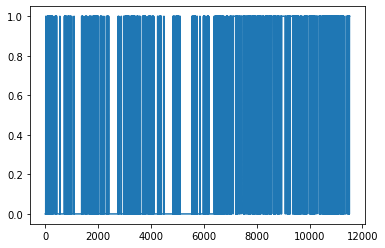

In [8]:
plt.plot(prediction_cluster)

In [9]:
from sklearn.metrics import confusion_matrix
cf_matrix_result=confusion_matrix(Type-1, prediction_cluster)

cf_matrix_result

array([[6277,  707],
       [1370, 3166]])

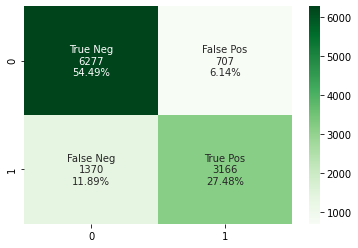

In [10]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_result.flatten()/np.sum(cf_matrix_result)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_result, annot=labels, fmt='', cmap='Greens')
plt.savefig(str(F) + "/R" + str(F) + "_" + 'cf_matrix-{}.png'.format(TrainRun+1), format='png')
plt.show()